In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./pima-indians-diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetespedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetespedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [29]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

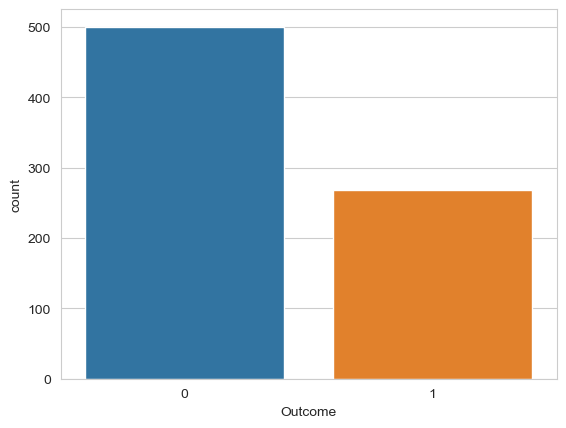

In [30]:
# Distribution of Outcome
sns.countplot(x='Outcome', data=df)
plt.show()

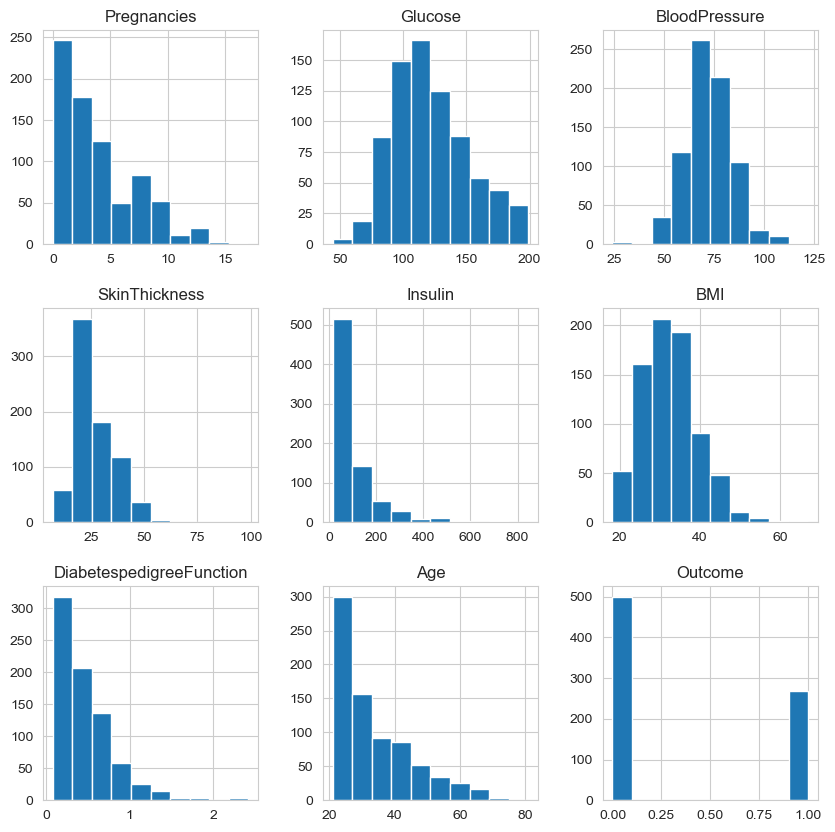

In [31]:
df.hist(bins=10,figsize=(10,10))
plt.show()

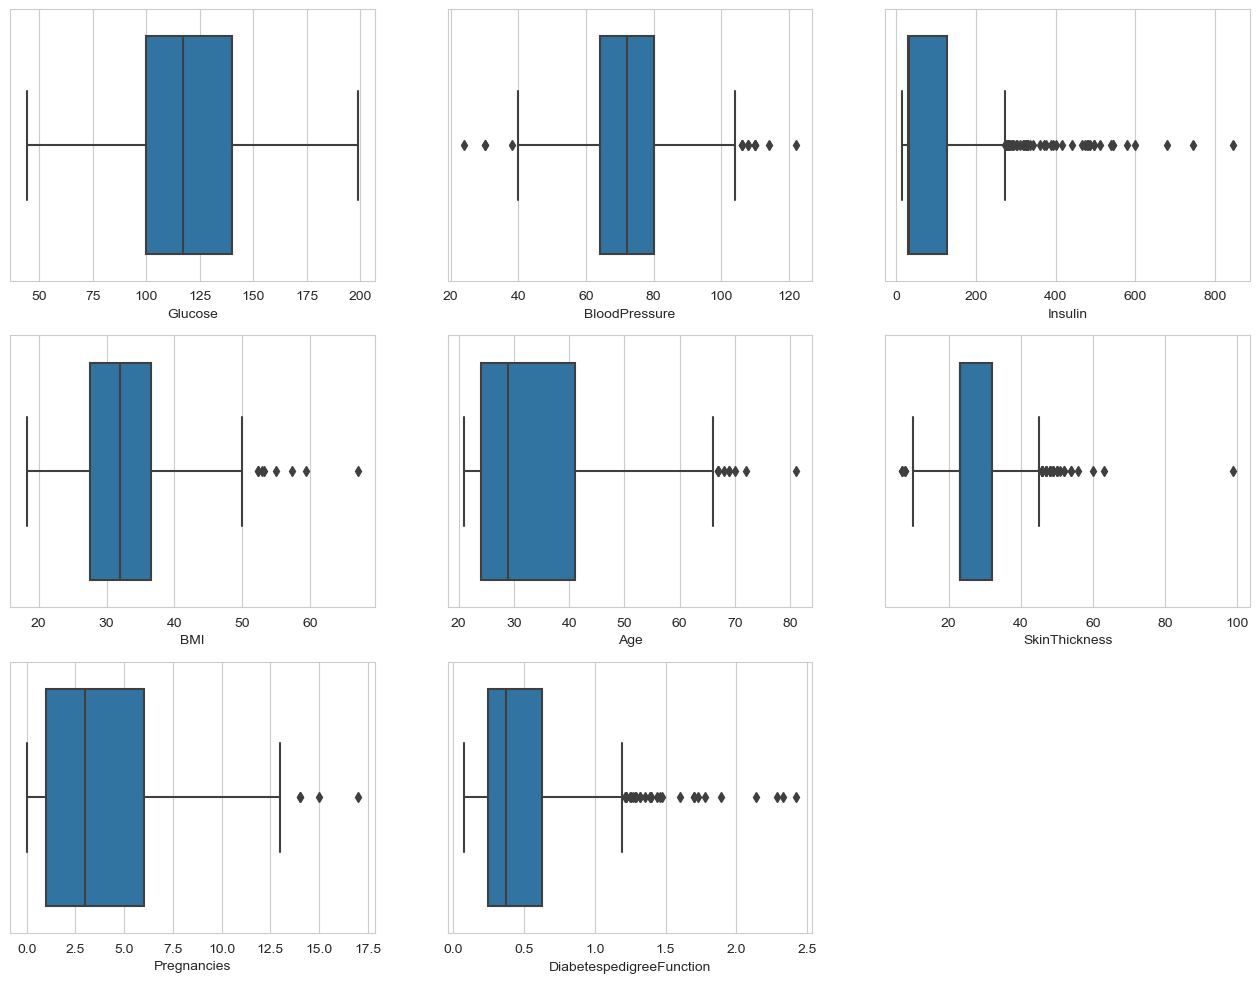

In [32]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetespedigreeFunction',data=df)
plt.show()

<Axes: >

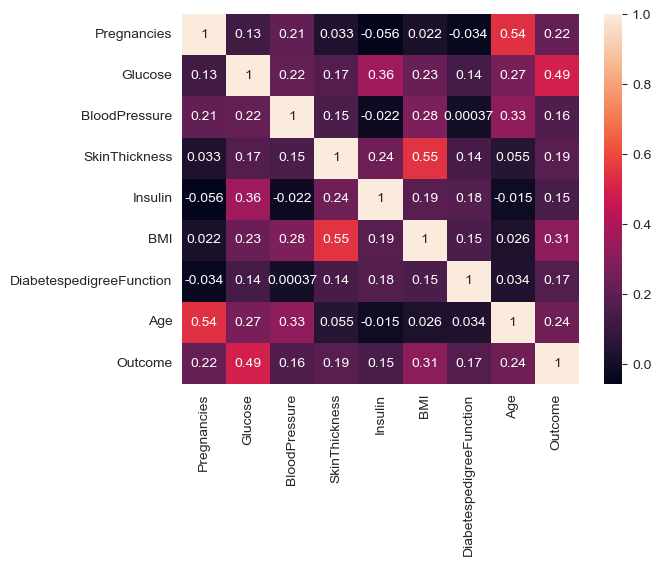

In [33]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop(['Outcome'],axis = 1)  
y = df['Outcome']    
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                      Specs        Score
4                   Insulin  1989.589394
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.933725
3             SkinThickness    85.431282
2             BloodPressure    41.394665
6  DiabetespedigreeFunction     5.392682


In [35]:
data_sf = df.drop(['DiabetespedigreeFunction','BloodPressure','SkinThickness'], axis = 1)
data_sf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

[0.10755929 0.23704745 0.09602034 0.08228827 0.07662622 0.14879235
 0.11338229 0.1382838 ]


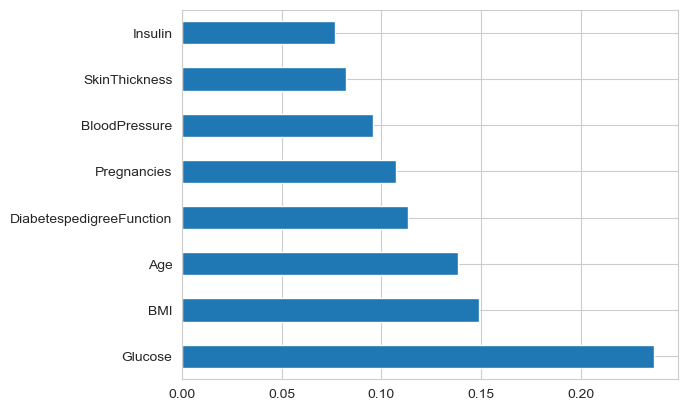

In [36]:
X = df.drop(['Outcome'],axis = 1)  
y = df['Outcome']   
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
from sklearn.preprocessing import QuantileTransformer
x=data_sf
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
df_new.head()

C:\Users\emxxjey\AppData\Local\anaconda31\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\emxxjey\AppData\Local\anaconda31\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.747718,0.810300,0.256193,0.591265,0.889831,1.0
1,0.232725,0.091265,0.256193,0.213168,0.558670,0.0
2,0.863755,0.956975,0.256193,0.077575,0.585398,1.0
3,0.232725,0.124511,0.662973,0.284224,0.000000,0.0
4,0.000000,0.721643,0.834420,0.926988,0.606258,1.0


<Axes: xlabel='Insulin'>

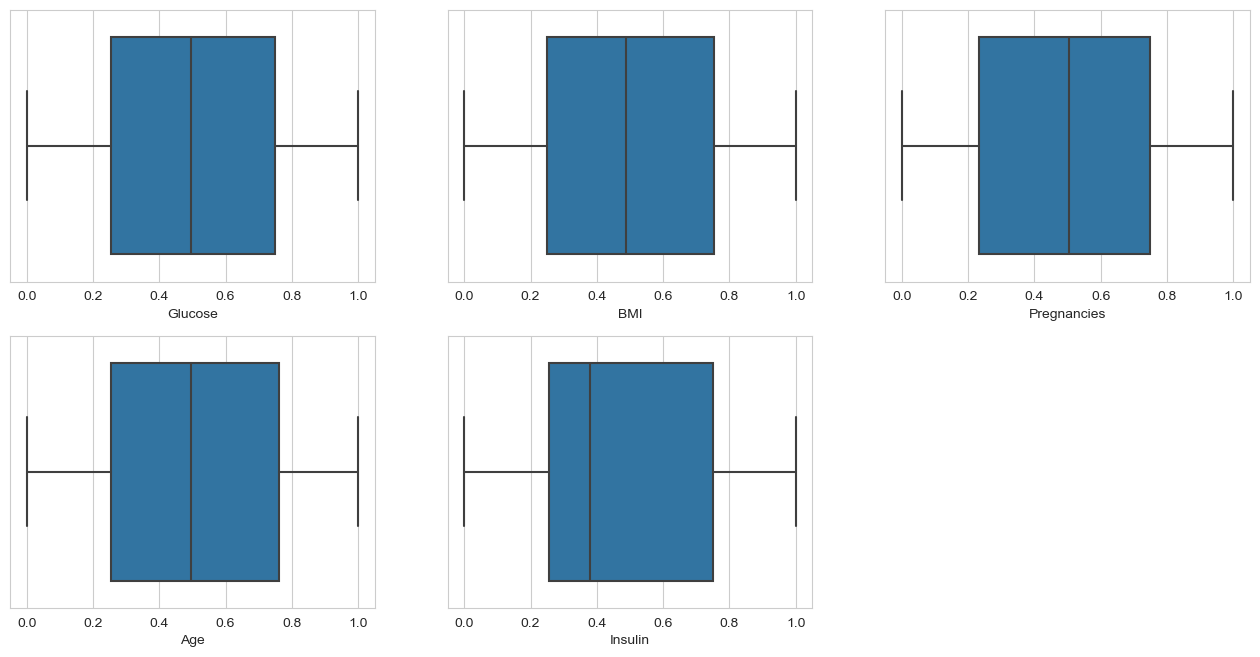

In [38]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['Insulin'],data=df_new)

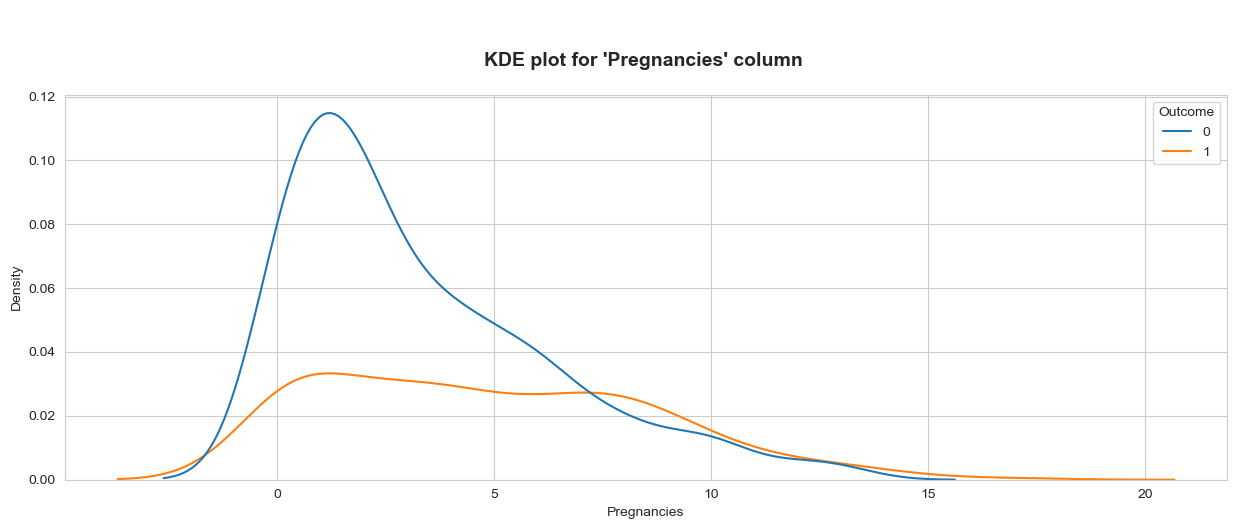

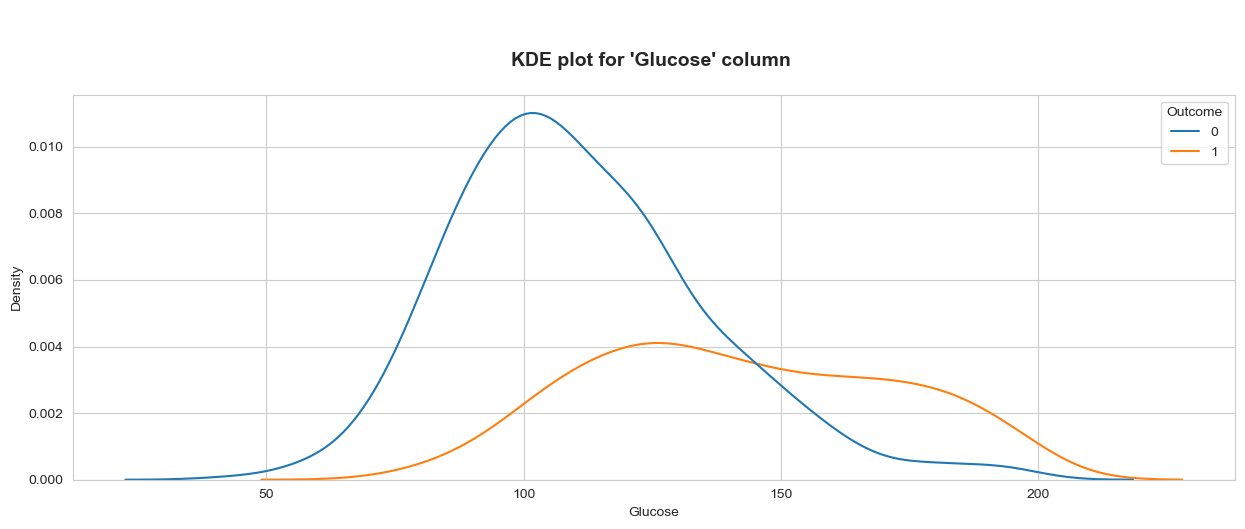

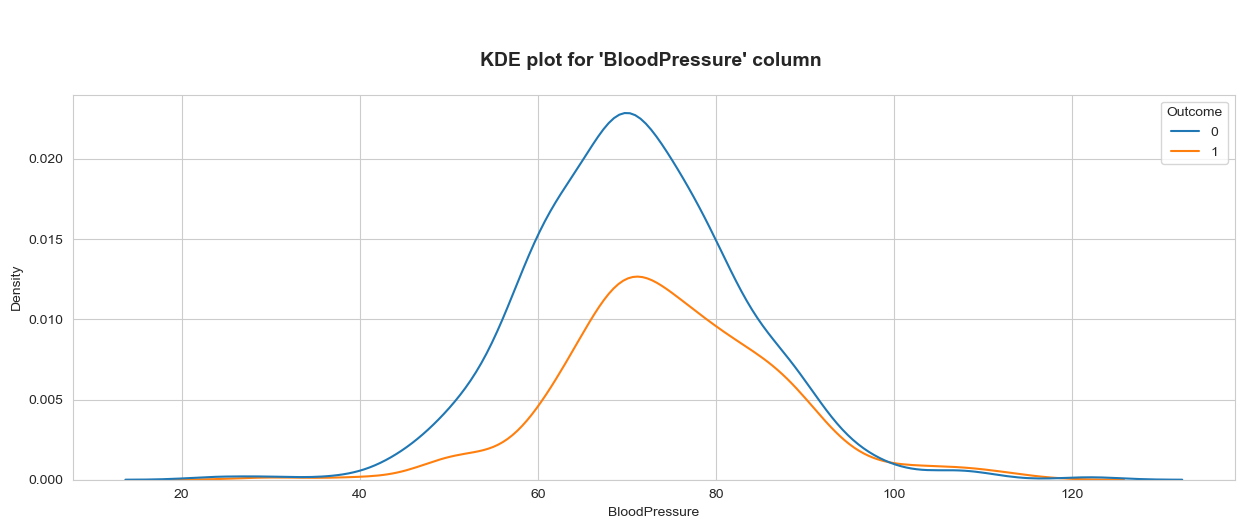

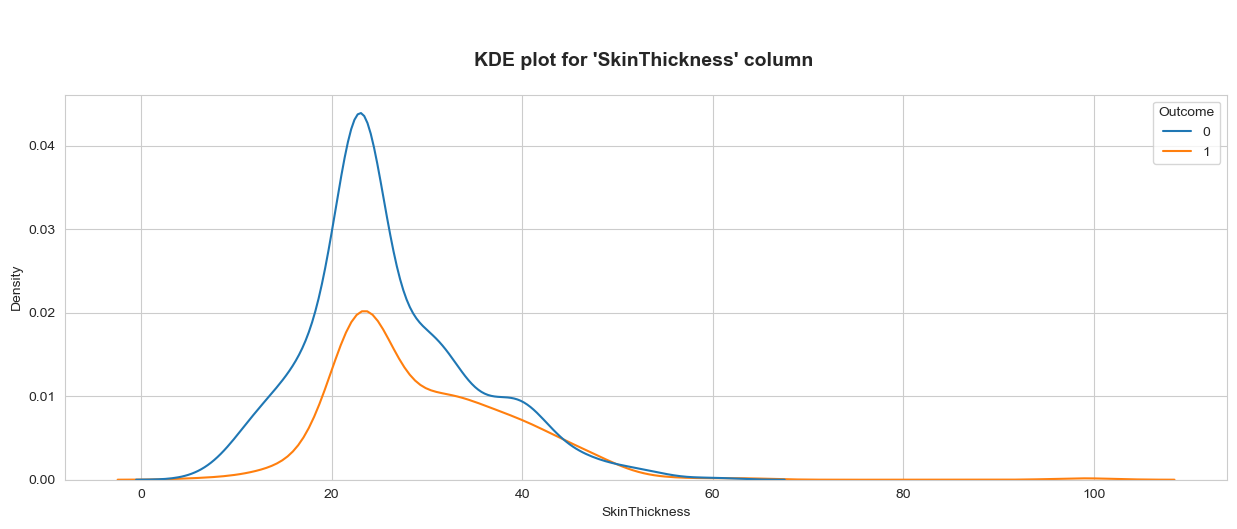

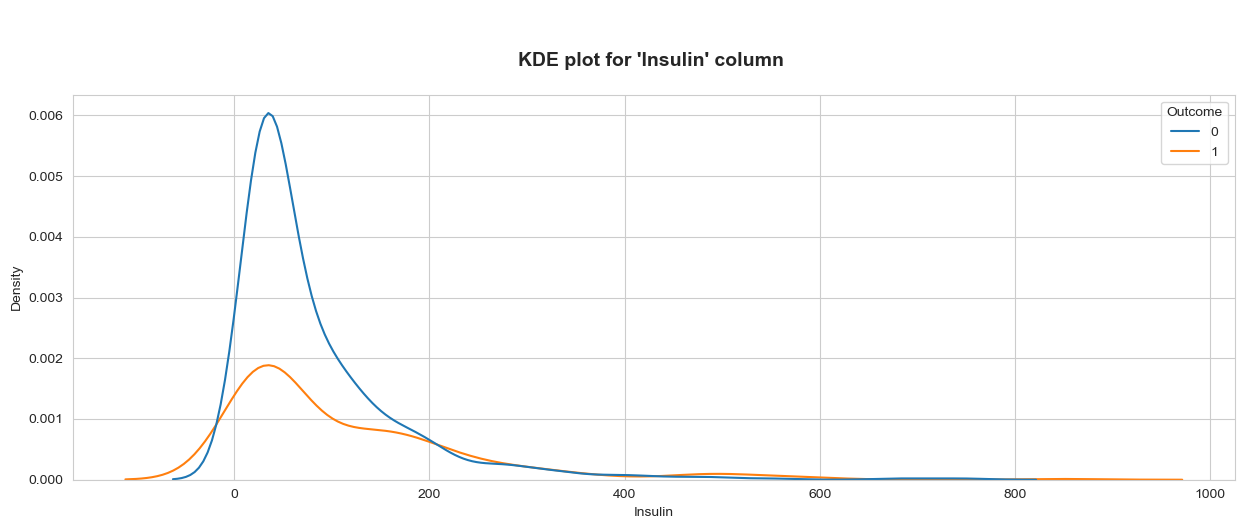

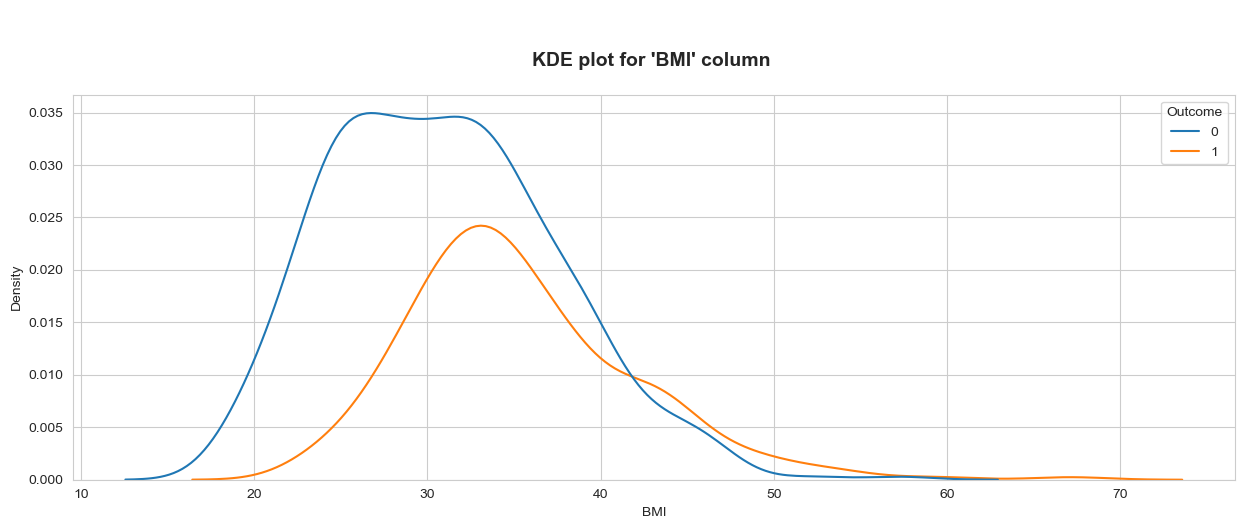

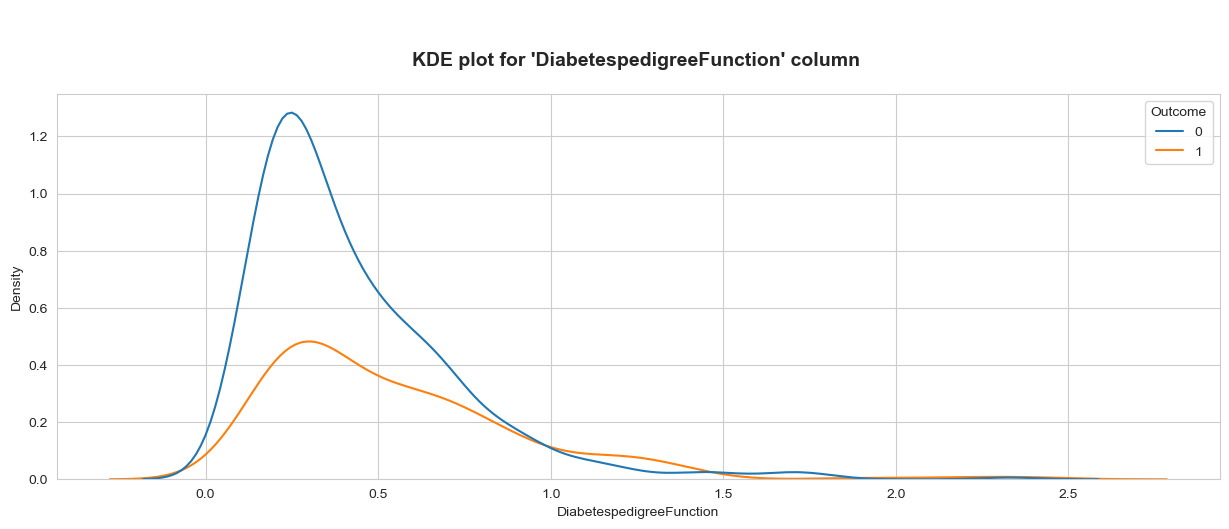

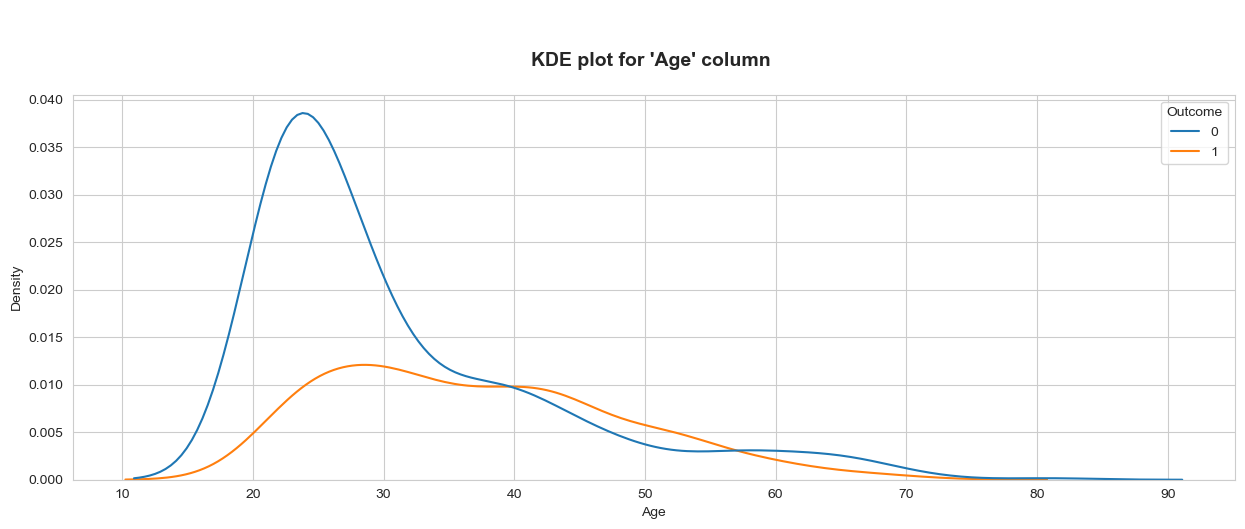

In [39]:
col1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age']
for c in col1:
    plt.figure(figsize=(15,5))
    sns.kdeplot(x=df[c],hue = df.Outcome)
    plt.title(f"\n\nKDE plot for '{c}' column \n", size=14, fontweight='bold')
    plt.show()

In [40]:
def thresholdsforOutliers(column_name):
    q1=df_new[column_name].quantile(q=0.25)
    q3=df_new[column_name].quantile(q=0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    return ({"upper":upper,"lower":lower})

In [41]:
df_new.shape

(768, 6)

In [42]:
df_new_rem= df_new
for col in df_new_rem.select_dtypes(include=np.number):
    print(col)
    count1 = df_new_rem[df_new_rem[col] == 0][col].count()
    print(count1)
    # if theer is no col with zero value 
    if(count1 != 0):
        thresholds=thresholdsforOutliers(col)
        col_upper=thresholds["upper"]
        col_lower=thresholds["lower"]

        percentage_removed=len(df_new_rem[df_new_rem[col]>col_upper])/len(df_new_rem)*100
        print(round(percentage_removed,2), "% data has ",col," greater than the upper threshold", col_upper)
        percentage_removed_lower=len(df_new_rem[df_new_rem[col]<col_lower])/len(df_new_rem)*100
        print(round(percentage_removed_lower,2), "% data has ",col," lesser than the lower threshold", col_lower)
        df_new_rem=df_new_rem[( df_new[col] > col_lower) & (df_new[col] < col_upper)]
        print("Shape after removing",df_new_rem.shape)

Pregnancies
111
0.0 % data has  Pregnancies  greater than the upper threshold 1.5202086049543677
0.0 % data has  Pregnancies  lesser than the lower threshold -0.5397653194263364
Shape after removing (768, 6)
Glucose
1
0.0 % data has  Glucose  greater than the upper threshold 1.4881844850065187
0.0 % data has  Glucose  lesser than the lower threshold -0.4837842242503258
Shape after removing (768, 6)
Insulin
1
0.0 % data has  Insulin  greater than the upper threshold 1.4907105606258149
0.0 % data has  Insulin  lesser than the lower threshold -0.48451760104302477
Shape after removing (768, 6)
BMI
3
0.0 % data has  BMI  greater than the upper threshold 1.5097783572359846
0.0 % data has  BMI  lesser than the lower threshold -0.5084745762711866
Shape after removing (768, 6)
Age
63
0.0 % data has  Age  greater than the upper threshold 1.5228161668839637
0.0 % data has  Age  lesser than the lower threshold -0.5058670143415909
Shape after removing (768, 6)
Outcome
500
0.0 % data has  Outcome  g

In [43]:
df_new = df_new_rem

In [44]:
# Split data into features and target
X = df_new.drop(['Outcome'],axis = 1)
y = df_new['Outcome']
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,0.747718,0.810300,0.256193,0.591265,0.889831
1,0.232725,0.091265,0.256193,0.213168,0.558670
2,0.863755,0.956975,0.256193,0.077575,0.585398
3,0.232725,0.124511,0.662973,0.284224,0.000000
4,0.000000,0.721643,0.834420,0.926988,0.606258


In [45]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize your features (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Define a dictionary to store the results of each model
results = {}

In [47]:
#Fitting  KNeighbors Classifier model to the Traning Set
from sklearn.neighbors import KNeighborsClassifier 
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [48]:
# Evaluate the KNN model
from sklearn import metrics

KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)
KNN_precision = metrics.precision_score(y_test, knn_y_pred)
KNN_recall = metrics.recall_score(y_test, knn_y_pred)
KNN_f1 = metrics.f1_score(y_test, knn_y_pred)
KNN_error_rate = 1 - KNN_accuracy  #

# Store the results of KNN model in the dictionary
results["KNN"] = {"accuracy": KNN_accuracy,
                  "precision": KNN_precision,
                  "recall": KNN_recall,
                  "f1_score": KNN_f1,
                  "error_rate":KNN_error_rate  #
                 }

In [49]:
#Fitting The Random Forest Classifier model to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(X_train,y_train)
RF_y_pred = RF.predict(X_test)

In [50]:
# Evaluate the Random Forest Classifier model
RF_accuracy = metrics.accuracy_score(y_test, RF_y_pred)
RF_precision = metrics.precision_score(y_test, RF_y_pred)
RF_recall = metrics.recall_score(y_test, RF_y_pred)
RF_f1 = metrics.f1_score(y_test, RF_y_pred)
RF_error_rate = 1 - RF_accuracy


# Store the results of Random Forest model in the dictionary
results["RF"] = {"accuracy": RF_accuracy,
                  "precision": RF_precision,
                  "recall": RF_recall,
                  "f1_score": RF_f1,
                  "error_rate": RF_error_rate
                 }

In [51]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_y_pred = DT.predict(X_test)

In [52]:
# Evaluate the Decision Tree Classifier model
DT_accuracy = metrics.accuracy_score(y_test, DT_y_pred)
DT_precision = metrics.precision_score(y_test, DT_y_pred)
DT_recall = metrics.recall_score(y_test, DT_y_pred)
DT_f1 = metrics.f1_score(y_test, DT_y_pred)
DT_error_rate = 1 - DT_accuracy

# Store the results of Decision Tree model in the dictionary
results["DT"] = {"accuracy": DT_accuracy,
                  "precision": DT_precision,
                  "recall": DT_recall,
                  "f1_score": DT_f1,
                  "error_rate": DT_error_rate
                 }

In [53]:
#Fitting The LogisticRegression Classifier model to the Traning Set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_y_pred = LR.predict(X_test)

In [54]:
# Evaluate the LogisticRegression Classifier model
LR_accuracy = metrics.accuracy_score(y_test, LR_y_pred)
LR_precision = metrics.precision_score(y_test, LR_y_pred)
LR_recall = metrics.recall_score(y_test, LR_y_pred)
LR_f1 = metrics.f1_score(y_test, LR_y_pred)
LR_error_rate = 1 - LR_accuracy

# Store the results of LogisticRegression model in the dictionary
results["LR"] = {"accuracy": LR_accuracy,
                  "precision": LR_precision,
                  "recall": LR_recall,
                  "f1_score": LR_f1,
                  "error_rate": LR_error_rate
                 }

In [55]:
#Fitting The GaussianNB Classifier model to the Traning Set
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_y_pred = GNB.predict(X_test)

In [56]:
# Evaluate the GNB Classifier model
GNB_accuracy = metrics.accuracy_score(y_test, GNB_y_pred)
GNB_precision = metrics.precision_score(y_test, GNB_y_pred)
GNB_recall = metrics.recall_score(y_test, GNB_y_pred)
GNB_f1 = metrics.f1_score(y_test, GNB_y_pred)
GNB_error_rate = 1 - GNB_accuracy

# Store the results of LogisticRegression model in the dictionary
results["GNB"] = {"accuracy": GNB_accuracy,
                  "precision": GNB_precision,
                  "recall": GNB_recall,
                  "f1_score": GNB_f1,
                  "error_rate": GNB_error_rate
                 }

In [57]:
#Fitting The SVM Classifier model to the Traning Set
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)
SVM_y_pred = SVM.predict(X_test)

In [58]:
# Evaluate the SVM Classifier model
SVM_accuracy = metrics.accuracy_score(y_test, SVM_y_pred)
SVM_precision = metrics.precision_score(y_test, SVM_y_pred)
SVM_recall = metrics.recall_score(y_test, SVM_y_pred)
SVM_f1 = metrics.f1_score(y_test, SVM_y_pred)
SVM_error_rate = 1 - SVM_accuracy

# Store the results of LogisticRegression model in the dictionary
results["SVM"] = {"accuracy": SVM_accuracy,
                  "precision": SVM_precision,
                  "recall": SVM_recall,
                  "f1_score": SVM_f1,
                  "error_rate": SVM_error_rate
                 }

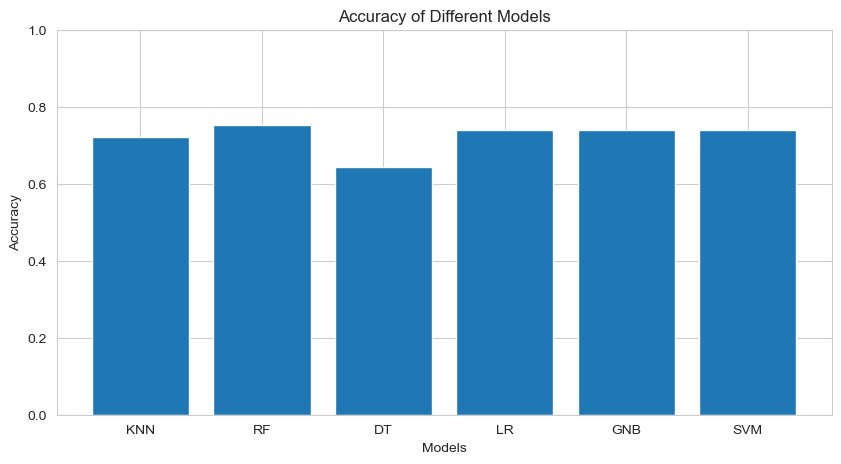

In [59]:
# Plot the accuracy of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

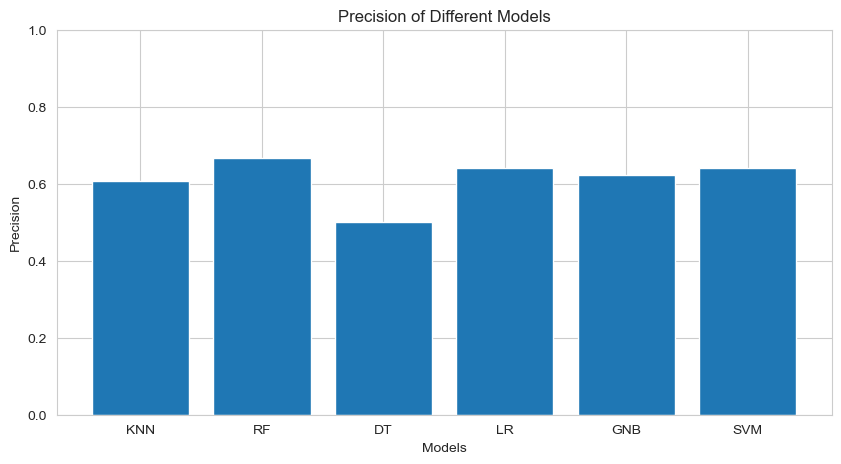

In [60]:
# Plot the precision of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

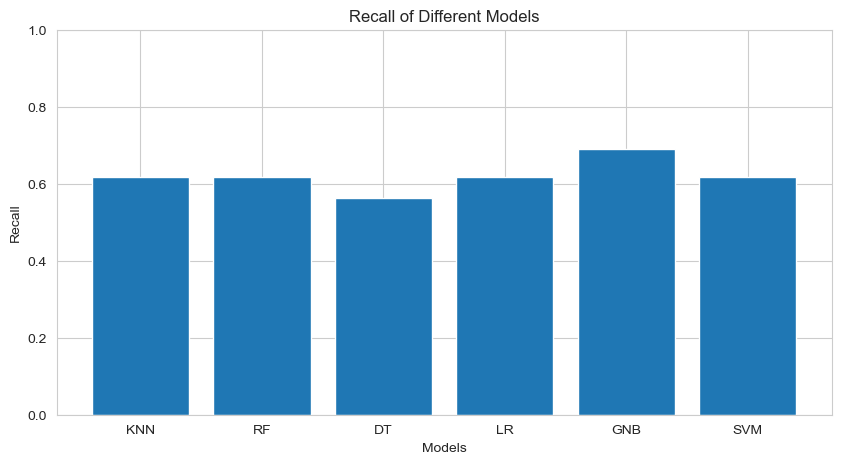

In [61]:
# Plot the recall of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

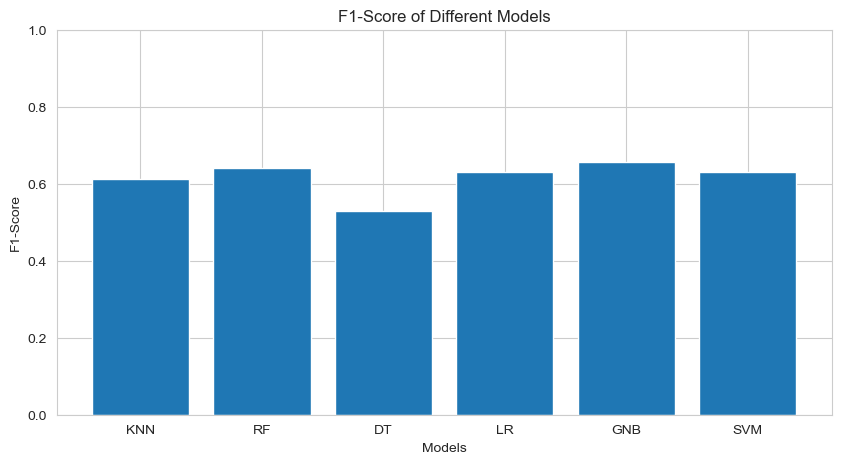

In [62]:
# Plot the F1-score of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()


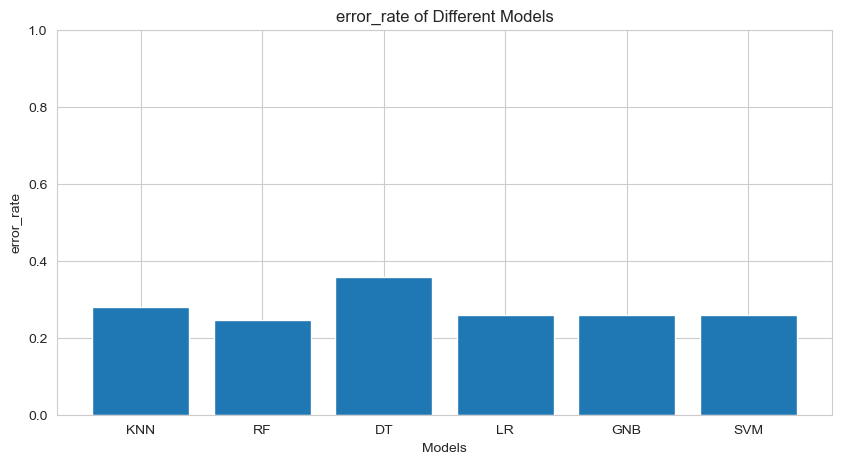

In [63]:
# Plot the error_rate of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["error_rate"] for result in results.values()])
plt.title("error_rate of Different Models")
plt.xlabel("Models")
plt.ylabel("error_rate")
plt.ylim(0, 1)
plt.show()

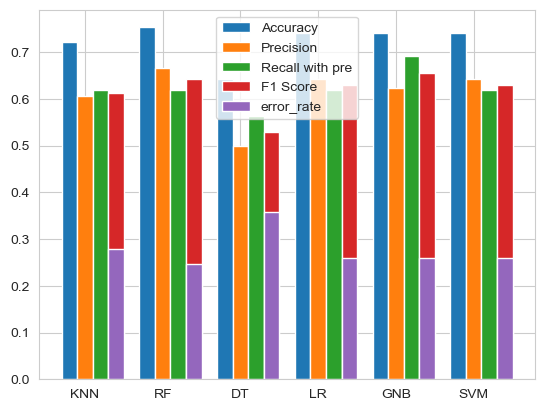

In [64]:
# extract metrics values
import numpy as np
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]
error_rate = [results[model]['error_rate'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall with pre')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')
plt.bar(index + 3 * bar_width, error_rate, bar_width, label='error_rate')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()
plt.show()

In [65]:
print(recalls)

[0.6181818181818182, 0.6181818181818182, 0.5636363636363636, 0.6181818181818182, 0.6909090909090909, 0.6181818181818182]


In [66]:
print(error_rate)

[0.27922077922077926, 0.24675324675324672, 0.3571428571428571, 0.2597402597402597, 0.2597402597402597, 0.2597402597402597]
